In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
dt = pd.read_csv('./Data/clean_vehicles.csv')

# Filtering POC

In [3]:
def filter_df(data, criteria) -> pd.DataFrame:
    return data.loc[(data[list(criteria)] == pd.Series(criteria)).all(axis=1)]


In [4]:
dt.shape

(383487, 26)

In [5]:
test_crit = {'manufacturer':'honda', 'model':'civic'}
res = filter_df(dt, criteria=test_crit)

In [6]:
res

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
1134,1134,7305902049,https://bham.craigslist.org/ctd/d/nashville-20...,birmingham,https://bham.craigslist.org,6000,2012.0,honda,civic,good,4 cylinders,gas,120000.0,rebuilt,automatic,missing,fwd,full-size,sedan,silver,https://images.craigslist.org/00p0p_8JL0WKIiaF...,✅FUEL EFFICIENT! ✅SMOOTH RIDE! ✅RELIABLE! ✅ FR...,al,36.137900,-86.741000,2021-04-12T17:23:59-0500
1189,1189,7305221733,https://bham.craigslist.org/cto/d/trussville-2...,birmingham,https://bham.craigslist.org,4500,2006.0,honda,civic,good,4 cylinders,gas,170000.0,clean,automatic,missing,fwd,mid-size,sedan,white,https://images.craigslist.org/00808_89vilY0hNo...,2006 Honda Civic For sale! Very dependable dai...,al,33.633900,-86.598100,2021-04-11T12:23:09-0500
1228,1228,7304871964,https://bham.craigslist.org/ctd/d/powder-sprin...,birmingham,https://bham.craigslist.org,3900,2001.0,honda,civic,good,4 cylinders,gas,144000.0,clean,automatic,1HGES16551L064786,fwd,compact,sedan,black,https://images.craigslist.org/00q0q_6ts0oo2c7O...,This jet black Honda Civic has been very well ...,al,33.913500,-84.685900,2021-04-10T15:25:54-0500
1739,1739,7305692925,https://dothan.craigslist.org/cto/d/abbeville-...,dothan,https://dothan.craigslist.org,9300,2012.0,honda,civic,good,4 cylinders,gas,100600.0,clean,automatic,missing,fwd,full-size,sedan,white,https://images.craigslist.org/00D0D_ctKNHLpDNX...,2012 Honda Civic Very Clean car with no issues...,al,31.575500,-85.279000,2021-04-12T11:50:14-0500
2190,2190,7316320089,https://huntsville.craigslist.org/cto/d/huntsv...,huntsville / decatur,https://huntsville.craigslist.org,6999,2012.0,honda,civic,good,4 cylinders,gas,120800.0,clean,automatic,2HGFB2F55CH561072,fwd,full-size,sedan,brown,https://images.craigslist.org/00Q0Q_8c02yZKzjo...,For Sale by Owner a 2012 Honda Civic 4-Door Se...,al,34.734000,-86.522900,2021-05-03T13:05:06-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382692,382692,7306882306,https://wausau.craigslist.org/ctd/d/wausau-201...,wausau,https://wausau.craigslist.org,7990,2010.0,honda,civic,excellent,4 cylinders,hybrid,104706.0,clean,automatic,JHMFA3F28AS001063,fwd,sub-compact,sedan,blue,https://images.craigslist.org/00q0q_cuFaHFBBPw...,2010 Honda Civic Hybrid 📲 ☎ Call or text Car...,wi,44.935677,-89.617256,2021-04-14T15:46:58-0500
383184,383184,7310072908,https://wyoming.craigslist.org/cto/d/laramie-2...,wyoming,https://wyoming.craigslist.org,11280,2015.0,honda,civic,good,8 cylinders,gas,48710.0,clean,automatic,missing,fwd,sub-compact,bus,white,https://images.craigslist.org/00t0t_89UTZtdN4g...,Great vehicle! No mechanical issues whatsoever...,wy,41.424700,-105.478100,2021-04-20T16:20:03-0600
383364,383364,7304360046,https://wyoming.craigslist.org/cto/d/laramie-2...,wyoming,https://wyoming.craigslist.org,2500,2005.0,honda,civic,good,4 cylinders,gas,185000.0,clean,manual,2HGES15535H620534,fwd,compact,sedan,grey,https://images.craigslist.org/00X0X_cN4El2UGW6...,Maintenance is up to date. I have been using ...,wy,41.326706,-105.586510,2021-04-09T14:27:59-0600
383458,383458,7302115020,https://wyoming.craigslist.org/ctd/d/billings-...,wyoming,https://wyoming.craigslist.org,4277,2005.0,honda,civic,good,8 cylinders,gas,236787.0,clean,automatic,1HGEM22945L050909,fwd,sub-compact,coupe,white,https://images.craigslist.org/00202_bPq7wKGB3e...,2005 Honda Civic SE coupe AT ☎ 406-283-3311 Ca...,wy,45.762900,-108.539000,2021-04-05T10:30:35-0600


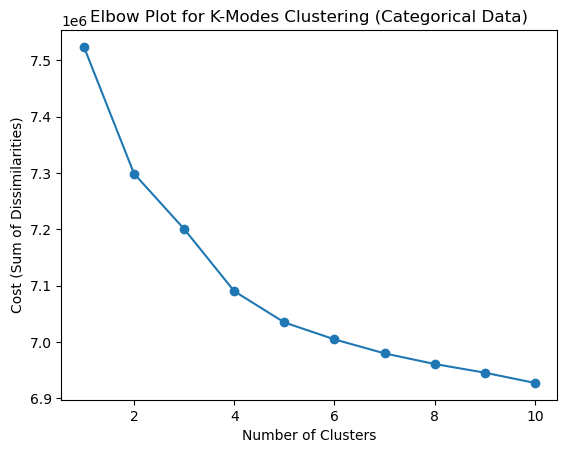

In [12]:
import pandas as pd
from kmodes.kmodes import KModes
from matplotlib import pyplot as plt

# Load your data
data = pd.read_csv("./Data/clean_vehicles.csv")

# Define a range of K values
k_range = range(1,11)

# Create an empty list to store cost values
cost_values = []

# Iterate through the K values
for k in k_range:
    # Initialize KModes with categorical columns
    kmodes = KModes(n_clusters=k, init='Cao', verbose=0)
    kmodes.fit(data)
    # Store cost (sum of dissimilarities) for this k
    cost_values.append(kmodes.cost_)

# Plot the elbow plot
plt.plot(k_range, cost_values, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost (Sum of Dissimilarities)")
plt.title("Elbow Plot for K-Modes Clustering (Categorical Data)")
plt.show()

# Notes

1. The data from the FE will be in the form of json so it'll have the coulmn name and the value to filter on. Eg: [{'make':'Honda', 'model':'civic'}]

### Selecting K = 4

In [20]:
import pandas as pd
from kmodes.kmodes import KModes
import prince 

data = pd.read_csv("./Data/clean_vehicles.csv")


mca = prince.MCA(n_components=4, random_state=42)
mca_result = mca.fit(data)

# obtain inertia to plot
exp_inertia = mca_result.explained_inertia_
# kmodes = KModes(n_clusters = 4, verbose = 0, init = 'Cao', n_jobs=8)
# clusters = kmodes.fit_predict(data)

: 

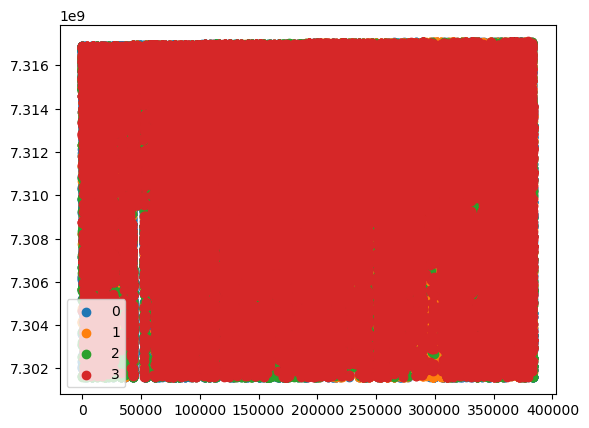

In [13]:
import numpy as np
from matplotlib import pyplot as plt

#Getting unique labels
u_labels = np.unique(clusters)
data = np.array(data)
#plotting the results:
for i in u_labels:
    # print(pd.DataFrame(data[clusters == i][:,0]))
    # break
    plt.scatter(data[clusters == i][:,0], data[clusters == i][:,1], label = i)
plt.legend()
plt.show()


In [17]:
print(clusters)

[3 3 3 ... 0 2 0]


<built-in method all of numpy.ndarray object at 0x2a315d3b0>
